In [60]:
import os
import pandas as pd
import numpy as np
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('words')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import seaborn as sns
import re
from textblob import TextBlob

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\SATYAJIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SATYAJIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
comments = pd.read_csv('C:/Users/SATYAJIT/Downloads/comment_file - Sheet2 (1).csv') # read the collected raw data

In [3]:
comments.head() # checking sample of the tabular data

Comment
0                       Just look at this australoid
1  Rahi baat muslim ki <br>Wo har govt. Me ek jai...
2  Aaj India me 80 crore log 1 time ka khana modi...
3  Ladki ko chedna Islam ne sikhaya waah <br>To r...
4  Tumne guru nanak ji ke sabse priye sathi kon t...

In [4]:
# converting .csv file to .txt for read string readability

text = list(comments['Comment'])
text = ' '.join(str(e) for e in text)
text

'Just look at this australoid Rahi baat muslim ki <br>Wo har govt. Me ek jaisa h <br>Up congress me masjid me 400 muslim ko goli mari <br>Up samajwadi me muzzafarnagar riots me yahi hua <br>Up bjp me same situation hai <br>BSS bsp me thoda sukun tha mila kuch nhi BSS jaan maal ka nuksaan nhi hua hai Aaj India me 80 crore log 1 time ka khana modi ke photo waale rasan bag par nirbhar h <br>Independent India ki nayi soch h ye <br>Make in India <br>Logo ko free me do yahi soch k vote denge baaki <br>Hunger index <br>Human right index <br>Freedom of media <br>Human development index<br>Democracy index<br>Global economic freedom index<br>Gender gap index<br>Global curruption index <br>Global hunger index <br>BSS ek baar jaake dekhlo pata chal jayega aapko modi yogi ne kya kiya hai Ladki ko chedna Islam ne sikhaya waah <br>To raavan ne kya kiya tha sita maa ke sath Tumne guru nanak ji ke sabse priye sathi kon the ye bhi btado <br>Joki the bhai Mastana<br>Or wo bhi muslim the Ask log bhukh say

In [5]:
# defining function to check the most frequently occuring word

def plot_word_frequency(words, top_n):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    sns.set(rc = {'figure.figsize':(15,8)})
    plot = sns.barplot(labels, counts)
    print(labels)
    return plot

['the', 'is', 'and', 'to', 'of', 'a', 'in', 'are', 'you', 'he']


<AxesSubplot:>

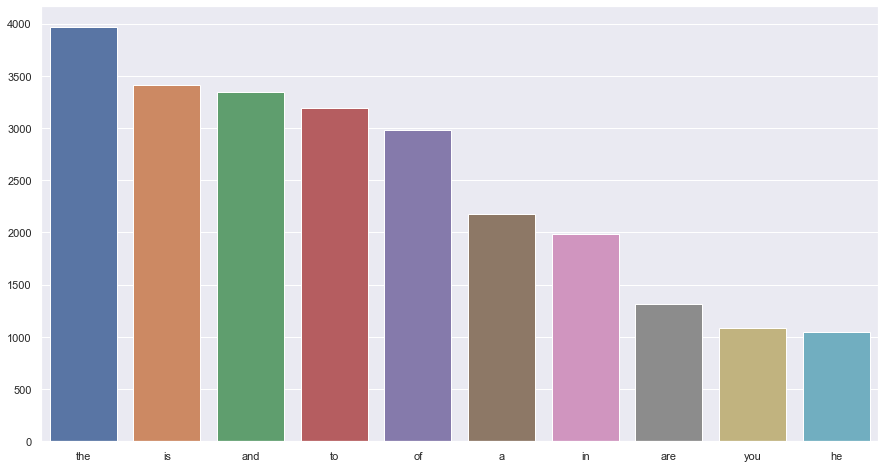

In [6]:
# frequently occuring words with unclean data(i.e. common phrases and acronyms present)
words = text.split()
plot_word_frequency(words, 10)

In [7]:
# defining stopwords i.e. unnecessary filler texts

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
# constructing custom stopword list

english = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'hai','I','ko','ki','ke','se','ka',',','like','.','The','He','This','one', 'bhi', 'aur', 'k','nahi', 'don&#39;t','ye', 'man','u', 'rss','<a','know','ho', 'guy', 'hi', 'even','h','ne', 'bhai', 'video', 'kya','also', 'and', 'said','rss', 'say','kill', 'say', 'think', 'say']

In [24]:
words

['Just',
 'look',
 'at',
 'this',
 'australoid',
 'Rahi',
 'baat',
 'muslim',
 'ki',
 '<br>Wo',
 'har',
 'govt.',
 'Me',
 'ek',
 'jaisa',
 'h',
 '<br>Up',
 'congress',
 'me',
 'masjid',
 'me',
 '400',
 'muslim',
 'ko',
 'goli',
 'mari',
 '<br>Up',
 'samajwadi',
 'me',
 'muzzafarnagar',
 'riots',
 'me',
 'yahi',
 'hua',
 '<br>Up',
 'bjp',
 'me',
 'same',
 'situation',
 'hai',
 '<br>BSS',
 'bsp',
 'me',
 'thoda',
 'sukun',
 'tha',
 'mila',
 'kuch',
 'nhi',
 'BSS',
 'jaan',
 'maal',
 'ka',
 'nuksaan',
 'nhi',
 'hua',
 'hai',
 'Aaj',
 'India',
 'me',
 '80',
 'crore',
 'log',
 '1',
 'time',
 'ka',
 'khana',
 'modi',
 'ke',
 'photo',
 'waale',
 'rasan',
 'bag',
 'par',
 'nirbhar',
 'h',
 '<br>Independent',
 'India',
 'ki',
 'nayi',
 'soch',
 'h',
 'ye',
 '<br>Make',
 'in',
 'India',
 '<br>Logo',
 'ko',
 'free',
 'me',
 'do',
 'yahi',
 'soch',
 'k',
 'vote',
 'denge',
 'baaki',
 '<br>Hunger',
 'index',
 '<br>Human',
 'right',
 'index',
 '<br>Freedom',
 'of',
 'media',
 '<br>Human',
 'developm

In [25]:
# cleaning the text i.e. removing stopwords

sample_words = [word.lower() for word in words if word not in english]
print(sample_words)

['just', 'look', 'australoid', 'rahi', 'baat', 'muslim', '<br>wo', 'har', 'govt.', 'me', 'ek', 'jaisa', '<br>up', 'congress', 'masjid', '400', 'muslim', 'goli', 'mari', '<br>up', 'samajwadi', 'muzzafarnagar', 'riots', 'yahi', 'hua', '<br>up', 'bjp', 'situation', '<br>bss', 'bsp', 'thoda', 'sukun', 'tha', 'mila', 'kuch', 'nhi', 'bss', 'jaan', 'maal', 'nuksaan', 'nhi', 'hua', 'aaj', 'india', '80', 'crore', 'log', '1', 'time', 'khana', 'modi', 'photo', 'waale', 'rasan', 'bag', 'par', 'nirbhar', '<br>independent', 'india', 'nayi', 'soch', '<br>make', 'india', '<br>logo', 'free', 'yahi', 'soch', 'vote', 'denge', 'baaki', '<br>hunger', 'index', '<br>human', 'right', 'index', '<br>freedom', 'media', '<br>human', 'development', 'index<br>democracy', 'index<br>global', 'economic', 'freedom', 'index<br>gender', 'gap', 'index<br>global', 'curruption', 'index', '<br>global', 'hunger', 'index', '<br>bss', 'ek', 'baar', 'jaake', 'dekhlo', 'pata', 'chal', 'jayega', 'aapko', 'modi', 'yogi', 'kiya', 'l

In [26]:
sample_text = " ".join(sample_words)
print(sample_text)

just look australoid rahi baat muslim <br>wo har govt. me ek jaisa <br>up congress masjid 400 muslim goli mari <br>up samajwadi muzzafarnagar riots yahi hua <br>up bjp situation <br>bss bsp thoda sukun tha mila kuch nhi bss jaan maal nuksaan nhi hua aaj india 80 crore log 1 time khana modi photo waale rasan bag par nirbhar <br>independent india nayi soch <br>make india <br>logo free yahi soch vote denge baaki <br>hunger index <br>human right index <br>freedom media <br>human development index<br>democracy index<br>global economic freedom index<br>gender gap index<br>global curruption index <br>global hunger index <br>bss ek baar jaake dekhlo pata chal jayega aapko modi yogi kiya ladki chedna islam sikhaya waah <br>to raavan kiya tha sita maa sath tumne guru nanak ji sabse priye sathi kon btado <br>joki mastana<br>or wo muslim ask log bhukh nahi khha khaa kar mar rahy h.<br>bimarioo say.<br>karan jajdda khaana.😱🙏 most hindus enjoy nice juicy medium rare steak...with side order crispy ch

['hindu', 'islam', 'india', 'religion', 'people', 'muslim', 'muslims', 'hindus', 'bible', 'christianity', 'god', 'country', 'quran', 'christian', 'hinduism']


<AxesSubplot:>

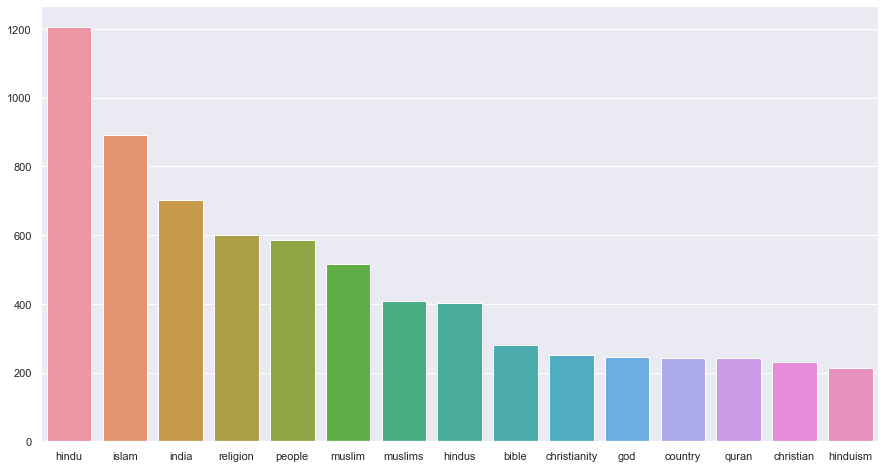

In [27]:
# plotting new word frequency with cleaned data

plot_word_frequency(sample_words, 15)

In [28]:
# snowball stemmer
stemmer = SnowballStemmer("english")
snowball_stemmed = [stemmer.stem(token) for token in sample_words]
print(snowball_stemmed)
len(snowball_stemmed)

['just', 'look', 'australoid', 'rahi', 'baat', 'muslim', '<br>wo', 'har', 'govt.', 'me', 'ek', 'jaisa', '<br>up', 'congress', 'masjid', '400', 'muslim', 'goli', 'mari', '<br>up', 'samajwadi', 'muzzafarnagar', 'riot', 'yahi', 'hua', '<br>up', 'bjp', 'situat', '<br>bss', 'bsp', 'thoda', 'sukun', 'tha', 'mila', 'kuch', 'nhi', 'bss', 'jaan', 'maal', 'nuksaan', 'nhi', 'hua', 'aaj', 'india', '80', 'crore', 'log', '1', 'time', 'khana', 'modi', 'photo', 'waal', 'rasan', 'bag', 'par', 'nirbhar', '<br>independ', 'india', 'nayi', 'soch', '<br>make', 'india', '<br>logo', 'free', 'yahi', 'soch', 'vote', 'deng', 'baaki', '<br>hunger', 'index', '<br>human', 'right', 'index', '<br>freedom', 'media', '<br>human', 'develop', 'index<br>democraci', 'index<br>glob', 'econom', 'freedom', 'index<br>gend', 'gap', 'index<br>glob', 'currupt', 'index', '<br>global', 'hunger', 'index', '<br>bss', 'ek', 'baar', 'jaak', 'dekhlo', 'pata', 'chal', 'jayega', 'aapko', 'modi', 'yogi', 'kiya', 'ladki', 'chedna', 'islam',

109966

['hindu', 'islam', 'muslim', 'religion', 'india', 'peopl', 'christian', 'hindus', 'countri', 'god', 'bibl', 'indian', 'say', 'quran', 'nationalist']


<AxesSubplot:>

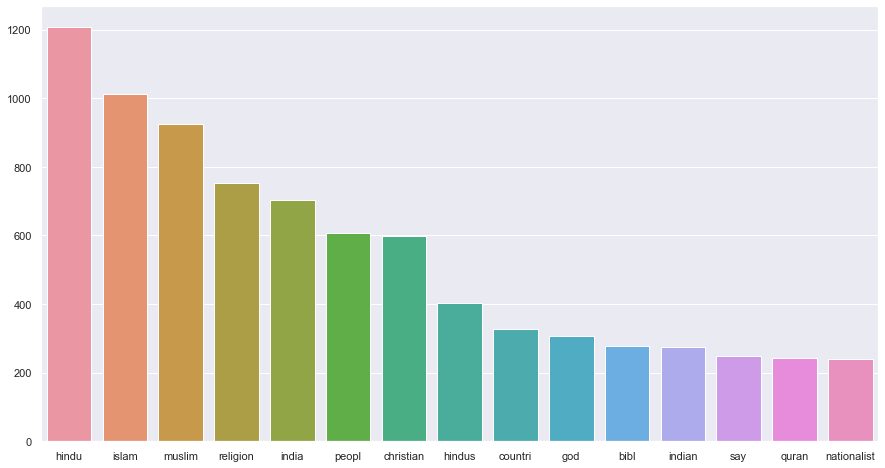

In [29]:
# plotting new word frequency with cleaned data

plot_word_frequency(snowball_stemmed, 15)

In [30]:
# we have a lot of hindi words. lets convert them to english and further clean the data from the beginning.

In [31]:
text

'Just look at this australoid Rahi baat muslim ki <br>Wo har govt. Me ek jaisa h <br>Up congress me masjid me 400 muslim ko goli mari <br>Up samajwadi me muzzafarnagar riots me yahi hua <br>Up bjp me same situation hai <br>BSS bsp me thoda sukun tha mila kuch nhi BSS jaan maal ka nuksaan nhi hua hai Aaj India me 80 crore log 1 time ka khana modi ke photo waale rasan bag par nirbhar h <br>Independent India ki nayi soch h ye <br>Make in India <br>Logo ko free me do yahi soch k vote denge baaki <br>Hunger index <br>Human right index <br>Freedom of media <br>Human development index<br>Democracy index<br>Global economic freedom index<br>Gender gap index<br>Global curruption index <br>Global hunger index <br>BSS ek baar jaake dekhlo pata chal jayega aapko modi yogi ne kya kiya hai Ladki ko chedna Islam ne sikhaya waah <br>To raavan ne kya kiya tha sita maa ke sath Tumne guru nanak ji ke sabse priye sathi kon the ye bhi btado <br>Joki the bhai Mastana<br>Or wo bhi muslim the Ask log bhukh say

In [34]:
# remove punctuations
no_punct = re.sub("[^-9A-Za-z ]", "" , text)
no_punct

'Just look at this australoid Rahi baat muslim ki brWo har govt Me ek jaisa h brUp congress me masjid me  muslim ko goli mari brUp samajwadi me muzzafarnagar riots me yahi hua brUp bjp me same situation hai brBSS bsp me thoda sukun tha mila kuch nhi BSS jaan maal ka nuksaan nhi hua hai Aaj India me  crore log  time ka khana modi ke photo waale rasan bag par nirbhar h brIndependent India ki nayi soch h ye brMake in India brLogo ko free me do yahi soch k vote denge baaki brHunger index brHuman right index brFreedom of media brHuman development indexbrDemocracy indexbrGlobal economic freedom indexbrGender gap indexbrGlobal curruption index brGlobal hunger index brBSS ek baar jaake dekhlo pata chal jayega aapko modi yogi ne kya kiya hai Ladki ko chedna Islam ne sikhaya waah brTo raavan ne kya kiya tha sita maa ke sath Tumne guru nanak ji ke sabse priye sathi kon the ye bhi btado brJoki the bhai MastanabrOr wo bhi muslim the Ask log bhukh say Nahi khha Khaa Kar mar Rahy hbrBimarioo saybrKar

In [53]:
#remove extra spaces
no_space = re.sub("\s+"," ", no_punct)
no_space

'Just look at this australoid Rahi baat muslim ki brWo har govt Me ek jaisa h brUp congress me masjid me muslim ko goli mari brUp samajwadi me muzzafarnagar riots me yahi hua brUp bjp me same situation hai brBSS bsp me thoda sukun tha mila kuch nhi BSS jaan maal ka nuksaan nhi hua hai Aaj India me crore log time ka khana modi ke photo waale rasan bag par nirbhar h brIndependent India ki nayi soch h ye brMake in India brLogo ko free me do yahi soch k vote denge baaki brHunger index brHuman right index brFreedom of media brHuman development indexbrDemocracy indexbrGlobal economic freedom indexbrGender gap indexbrGlobal curruption index brGlobal hunger index brBSS ek baar jaake dekhlo pata chal jayega aapko modi yogi ne kya kiya hai Ladki ko chedna Islam ne sikhaya waah brTo raavan ne kya kiya tha sita maa ke sath Tumne guru nanak ji ke sabse priye sathi kon the ye bhi btado brJoki the bhai MastanabrOr wo bhi muslim the Ask log bhukh say Nahi khha Khaa Kar mar Rahy hbrBimarioo saybrKaran 

In [68]:
#lemmatizing text
# tokenise text
tokens = word_tokenize(text)
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
lemmatized

['Just',
 'look',
 'at',
 'this',
 'australoid',
 'Rahi',
 'baat',
 'muslim',
 'ki',
 '<',
 'br',
 '>',
 'Wo',
 'har',
 'govt',
 '.',
 'Me',
 'ek',
 'jaisa',
 'h',
 '<',
 'br',
 '>',
 'Up',
 'congress',
 'me',
 'masjid',
 'me',
 '400',
 'muslim',
 'ko',
 'goli',
 'mari',
 '<',
 'br',
 '>',
 'Up',
 'samajwadi',
 'me',
 'muzzafarnagar',
 'riot',
 'me',
 'yahi',
 'hua',
 '<',
 'br',
 '>',
 'Up',
 'bjp',
 'me',
 'same',
 'situation',
 'hai',
 '<',
 'br',
 '>',
 'BSS',
 'bsp',
 'me',
 'thoda',
 'sukun',
 'tha',
 'mila',
 'kuch',
 'nhi',
 'BSS',
 'jaan',
 'maal',
 'ka',
 'nuksaan',
 'nhi',
 'hua',
 'hai',
 'Aaj',
 'India',
 'me',
 '80',
 'crore',
 'log',
 '1',
 'time',
 'ka',
 'khana',
 'modi',
 'ke',
 'photo',
 'waale',
 'rasan',
 'bag',
 'par',
 'nirbhar',
 'h',
 '<',
 'br',
 '>',
 'Independent',
 'India',
 'ki',
 'nayi',
 'soch',
 'h',
 'ye',
 '<',
 'br',
 '>',
 'Make',
 'in',
 'India',
 '<',
 'br',
 '>',
 'Logo',
 'ko',
 'free',
 'me',
 'do',
 'yahi',
 'soch',
 'k',
 'vote',
 'denge',
 '

In [82]:
# removing unnecessary text fillers

lemmatize = [ i for i in lemmatized if len(i)>3]
lemmatize

['Just',
 'look',
 'this',
 'australoid',
 'Rahi',
 'baat',
 'muslim',
 'govt',
 'jaisa',
 'congress',
 'masjid',
 'muslim',
 'goli',
 'mari',
 'samajwadi',
 'muzzafarnagar',
 'riot',
 'yahi',
 'same',
 'situation',
 'thoda',
 'sukun',
 'mila',
 'kuch',
 'jaan',
 'maal',
 'nuksaan',
 'India',
 'crore',
 'time',
 'khana',
 'modi',
 'photo',
 'waale',
 'rasan',
 'nirbhar',
 'Independent',
 'India',
 'nayi',
 'soch',
 'Make',
 'India',
 'Logo',
 'free',
 'yahi',
 'soch',
 'vote',
 'denge',
 'baaki',
 'Hunger',
 'index',
 'Human',
 'right',
 'index',
 'Freedom',
 'medium',
 'Human',
 'development',
 'index',
 'Democracy',
 'index',
 'Global',
 'economic',
 'freedom',
 'index',
 'Gender',
 'index',
 'Global',
 'curruption',
 'index',
 'Global',
 'hunger',
 'index',
 'baar',
 'jaake',
 'dekhlo',
 'pata',
 'chal',
 'jayega',
 'aapko',
 'modi',
 'yogi',
 'kiya',
 'Ladki',
 'chedna',
 'Islam',
 'sikhaya',
 'waah',
 'raavan',
 'kiya',
 'sita',
 'sath',
 'Tumne',
 'guru',
 'nanak',
 'sabse',
 'pr

In [83]:
len(lemmatize)

106021

In [85]:
# removing non english words
res = [idx for idx in lemmatize if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx)]
res

['Just',
 'look',
 'this',
 'australoid',
 'Rahi',
 'baat',
 'muslim',
 'govt',
 'jaisa',
 'congress',
 'masjid',
 'muslim',
 'goli',
 'mari',
 'samajwadi',
 'muzzafarnagar',
 'riot',
 'yahi',
 'same',
 'situation',
 'thoda',
 'sukun',
 'mila',
 'kuch',
 'jaan',
 'maal',
 'nuksaan',
 'India',
 'crore',
 'time',
 'khana',
 'modi',
 'photo',
 'waale',
 'rasan',
 'nirbhar',
 'Independent',
 'India',
 'nayi',
 'soch',
 'Make',
 'India',
 'Logo',
 'free',
 'yahi',
 'soch',
 'vote',
 'denge',
 'baaki',
 'Hunger',
 'index',
 'Human',
 'right',
 'index',
 'Freedom',
 'medium',
 'Human',
 'development',
 'index',
 'Democracy',
 'index',
 'Global',
 'economic',
 'freedom',
 'index',
 'Gender',
 'index',
 'Global',
 'curruption',
 'index',
 'Global',
 'hunger',
 'index',
 'baar',
 'jaake',
 'dekhlo',
 'pata',
 'chal',
 'jayega',
 'aapko',
 'modi',
 'yogi',
 'kiya',
 'Ladki',
 'chedna',
 'Islam',
 'sikhaya',
 'waah',
 'raavan',
 'kiya',
 'sita',
 'sath',
 'Tumne',
 'guru',
 'nanak',
 'sabse',
 'pr

In [86]:
len(res)

102325

In [87]:
# removing stopwords
final = [word.lower() for word in res if word not in stopwords.words('english')]
print(final)

['just', 'look', 'australoid', 'rahi', 'baat', 'muslim', 'govt', 'jaisa', 'congress', 'masjid', 'muslim', 'goli', 'mari', 'samajwadi', 'muzzafarnagar', 'riot', 'yahi', 'situation', 'thoda', 'sukun', 'mila', 'kuch', 'jaan', 'maal', 'nuksaan', 'india', 'crore', 'time', 'khana', 'modi', 'photo', 'waale', 'rasan', 'nirbhar', 'independent', 'india', 'nayi', 'soch', 'make', 'india', 'logo', 'free', 'yahi', 'soch', 'vote', 'denge', 'baaki', 'hunger', 'index', 'human', 'right', 'index', 'freedom', 'medium', 'human', 'development', 'index', 'democracy', 'index', 'global', 'economic', 'freedom', 'index', 'gender', 'index', 'global', 'curruption', 'index', 'global', 'hunger', 'index', 'baar', 'jaake', 'dekhlo', 'pata', 'chal', 'jayega', 'aapko', 'modi', 'yogi', 'kiya', 'ladki', 'chedna', 'islam', 'sikhaya', 'waah', 'raavan', 'kiya', 'sita', 'sath', 'tumne', 'guru', 'nanak', 'sabse', 'priye', 'sathi', 'btado', 'joki', 'bhai', 'mastana', 'muslim', 'bhukh', 'nahi', 'khha', 'khaa', 'rahy', 'bimarioo'

In [88]:
len(final)

88394

['hindu', 'islam', 'religion', 'india', 'muslim', 'people', 'quot', '....', 'http', 'like']


<AxesSubplot:>

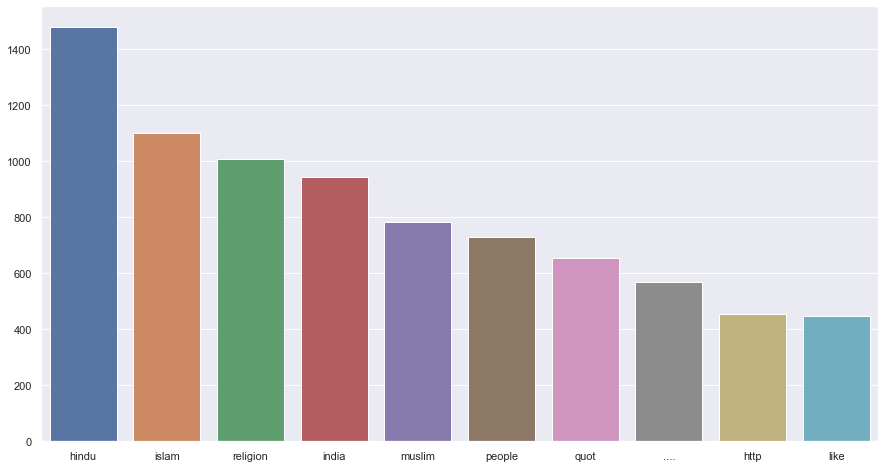

In [90]:
# plotting new word frequency with cleaned data

plot_word_frequency(final, 10)